# 衡量线性回归算法的指标
需要预测的值与实际值进行比较，可以通过MSE，RMSE，MAE，R²进行衡量
## 一、 MSE
MSE(Mean Squared Error)均方误差
1. 衡量标准：$\sum_{i=1}^m{(y^i_{test} - y^i)^2}$
2. 但是这个衡量标准是和m相关的，所以我们需要将上式整体除以m进行平均，我们就可以得到$MSE = \frac{\sum_{i=1}^m{(y^i_{test} - y^i)^2}}{m}$

## 二、 RMSEG
RMSE(Root Mean Squared Error)均方根误差
- 根据MSE的求解，我们可以看到这个量纲是带平方项的，所以我们需要去平方，根据基本数学原理，开方即可：
$$RMSE = \sqrt{MSE} = \sqrt{\frac{\sum_{i=1}^m{(y^i_{test} - y^i)^2}}{m}}$$

## 三、 MAE
MAE(Mean Absolute Error)平均绝对误差
- 根据推导的公式我们可以看出，两个点的距离也可以通过绝对值表现：$MAE = \frac{\sum_{i=1}^m|y^i_{test} - y^i|}{m}$

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X = boston.data[:,5] # average number of rooms per dwelling
y = boston.target

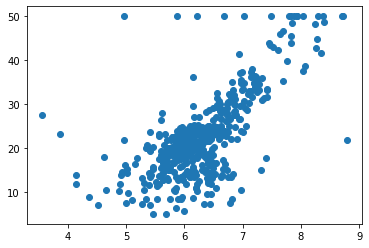

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.show()

In [5]:
X = X[y < 50]
y = y[y < 50]

In [6]:
from moon.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

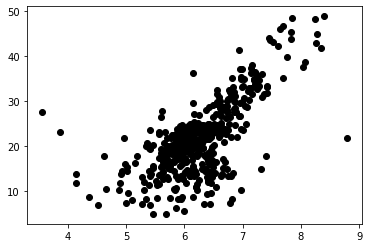

In [7]:
plt.scatter(X,y,color="black")
plt.show()

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(392,)
(98,)
(392,)
(98,)


In [9]:
from moon.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train,y_train)
y_predict = regression.predict(X_test)
print(y_predict.shape)

(98,)


In [10]:
from moon import metrics

mse = metrics.mean_squared_error(y_test,y_predict)
mae = metrics.mean_absolute_error(y_test,y_predict)
rmse = metrics.root_mean_squared_error(y_test, y_predict)

In [11]:
mse

33.483242061149646

In [12]:
mae

3.9474484396694005

In [15]:
rmse

5.786470604880806